In [1655]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import norm
from scipy import stats

In [1656]:
#train_data_pri = pd.read_csv('./data/private_train.csv')
train_data_pri = pd.read_csv('private_train_2.csv')
test_data_pri = pd.read_csv('./data/private_test.csv')
train_data_pri_p = pd.read_csv('private_train_2.csv')

In [1657]:
train_data_2017 = train_data_pri[train_data_pri.month.str.contains('2017')]
train_data_2015 = train_data_pri[train_data_pri.month.str.contains('2015')]
train_data_2016 = train_data_pri[train_data_pri.month.str.contains('2016')]

train_data_pri = pd.concat([train_data_2015,train_data_2016,train_data_2017])
train_data_pri.shape

(57149, 21)

In [1658]:
train_data_pri = train_data_pri.drop(['index'],axis=1)
test_data_pri = test_data_pri.drop(['index'],axis=1)
print train_data_pri.shape
print train_data_pri_p.shape
print test_data_pri.shape
print "List of Columns:\n", ", ".join(train_data_pri.columns), "\n\n"
print "List of Columns:\n", ", ".join(test_data_pri.columns), "\n\n"

(57149, 20)
(457288, 21)
(4033, 19)
List of Columns:
project_name, address, floor_area_sqm, type_of_land, price, contract_date, property_type, tenure, completion_date, type_of_sale, postal_district, postal_sector, postal_code, region, area, month, latitude, longitude, floor_num, unit_num 


List of Columns:
project_name, address, floor_area_sqm, type_of_land, contract_date, property_type, tenure, completion_date, type_of_sale, postal_district, postal_sector, postal_code, region, area, month, latitude, longitude, floor_num, unit_num 




In [1659]:
test_data_pri[test_data_pri['completion_date'] == 'Uncompleted'].completion_date.value_counts()

Series([], Name: completion_date, dtype: int64)

In [1660]:
train_data_pri[train_data_pri['completion_date'] == 'Uncompleted'].completion_date.value_counts()

Uncompleted    30915
Name: completion_date, dtype: int64

In [1661]:
#train_data_pri = train_data_pri.drop(train_data_pri[train_data_pri['completion_date'] == 'Uncompleted'].index) 
#did not help

In [1662]:
train_data_pri.shape

(57149, 20)

In [1663]:
test_data_pri.completion_date.unique()

array(['2014', '1995', '1979', '2015', '2016', '1992', '1998', '1986',
       '2011', '2010', '2000', '2012', '2001', '1999', '1968', '2004',
       '2006', 'Unknown', '2005', '2009', '1975', '2013', '1996', '1997',
       '1991', '1994', '2002', '1982', '2008', '2007', '1987', '1978',
       '1983', '1984', '1972', '1990', '1993', '1971', '2003', '1969',
       '1985', '1989', '2017', '1980', '1976', '1956', '1988', '1967',
       '1958', '1957', '1955', '1977', '1960', '1966', '1965', '1961',
       '1974', '1953', '1941', '1970', '1981', '1950', '1963', '1962'], dtype=object)

In [1664]:
train_data_pri.completion_date.unique()

array(['2012', '2005', 'Uncompleted', '2014', '1969', '2000', '2010',
       '1999', '2009', '1986', '1996', '2002', '2003', 'Unknown', '2013',
       '1998', '2007', '1973', '2006', '1997', '2004', '1979', '2008',
       '1993', '2001', '1976', '1984', '2011', '1991', '1994', '1995',
       '1983', '1978', '1990', '1992', '1957', '2015', '1982', '1967',
       '1929', '1985', '1958', '1975', '1980', '1948', '1977', '1963',
       '1962', '1989', '1987', '1960', '1981', '1968', '1952', '1965',
       '1988', '1959', '1964', '1972', '1930', '1971', '1974', '1956',
       '1955', '1954', '1966', '1939', '2016', '1953', '1970', '1951',
       '1938', '2017', '1932', '1961'], dtype=object)

In [1665]:
test_data_pri.type_of_land.unique()

array(['Strata', 'Land'], dtype=object)

In [1666]:
train_data_pri.type_of_land.unique()

array(['Strata', 'Land'], dtype=object)

In [1667]:
test_data_pri[test_data_pri['type_of_land'] == 'Unknown'].type_of_land.value_counts()

Series([], Name: type_of_land, dtype: int64)

In [1668]:
train_data_pri[train_data_pri['type_of_land'] == 'Unknown'].type_of_land.value_counts()

Series([], Name: type_of_land, dtype: int64)

In [1669]:
train_data_pri['contract_date'] = pd.to_datetime(train_data_pri['contract_date'])
train_data_pri['contract_date'] = train_data_pri['contract_date'].dt.strftime('%d/%m/%Y')
train_data_pri.contract_date.unique()

array([u'30/01/2015', u'29/01/2015', u'28/01/2015', u'27/01/2015',
       u'26/01/2015', u'25/01/2015', u'23/01/2015', u'22/01/2015',
       u'21/01/2015', u'20/01/2015', u'19/01/2015', u'17/01/2015',
       u'16/01/2015', u'15/01/2015', u'14/01/2015', u'13/01/2015',
       u'12/01/2015', u'10/01/2015', u'09/01/2015', u'08/01/2015',
       u'07/01/2015', u'06/01/2015', u'05/01/2015', u'02/01/2015',
       u'28/02/2015', u'27/02/2015', u'26/02/2015', u'25/02/2015',
       u'24/02/2015', u'23/02/2015', u'21/02/2015', u'19/02/2015',
       u'18/02/2015', u'17/02/2015', u'16/02/2015', u'13/02/2015',
       u'12/02/2015', u'11/02/2015', u'10/02/2015', u'09/02/2015',
       u'06/02/2015', u'05/02/2015', u'04/02/2015', u'03/02/2015',
       u'02/02/2015', u'31/03/2015', u'30/03/2015', u'27/03/2015',
       u'26/03/2015', u'25/03/2015', u'24/03/2015', u'23/03/2015',
       u'20/03/2015', u'19/03/2015', u'18/03/2015', u'17/03/2015',
       u'16/03/2015', u'13/03/2015', u'12/03/2015', u'11/03/20

In [1670]:
test_data_pri['contract_date'] = pd.to_datetime(test_data_pri['contract_date'])
test_data_pri['contract_date'] = test_data_pri['contract_date'].dt.strftime('%d/%m/%Y')
test_data_pri.contract_date.unique()

array([u'29/09/2017', u'28/09/2017', u'27/09/2017', u'26/09/2017',
       u'25/09/2017', u'22/09/2017', u'21/09/2017', u'20/09/2017',
       u'19/09/2017', u'18/09/2017', u'15/09/2017', u'14/09/2017',
       u'13/09/2017', u'12/09/2017', u'11/09/2017', u'08/09/2017',
       u'07/09/2017', u'06/09/2017', u'05/09/2017', u'04/09/2017',
       u'09/09/2017', u'05/10/2017', u'04/10/2017', u'03/10/2017',
       u'02/10/2017', u'23/09/2017', u'19/10/2017', u'18/10/2017',
       u'17/10/2017', u'16/10/2017', u'13/10/2017', u'12/10/2017',
       u'11/10/2017', u'10/10/2017', u'09/10/2017', u'06/10/2017',
       u'01/11/2017', u'31/10/2017', u'30/10/2017', u'29/10/2017',
       u'28/10/2017', u'27/10/2017', u'26/10/2017', u'25/10/2017',
       u'24/10/2017', u'23/10/2017', u'22/10/2017', u'21/10/2017',
       u'20/10/2017', u'11/11/2017', u'10/11/2017', u'09/11/2017',
       u'08/11/2017', u'07/11/2017', u'06/11/2017', u'03/11/2017',
       u'02/11/2017', u'27/11/2017', u'26/11/2017', u'24/11/20

In [1671]:
train_data_pri.month.unique()

array(['2015-1', '2015-2', '2015-3', '2015-4', '2015-5', '2015-6',
       '2015-7', '2015-8', '2015-9', '2015-10', '2015-11', '2015-12',
       '2016-1', '2016-2', '2016-3', '2016-4', '2016-5', '2016-6',
       '2016-7', '2016-8', '2016-9', '2016-10', '2016-11', '2016-12',
       '2017-1', '2017-2', '2017-3', '2017-4', '2017-5', '2017-6',
       '2017-7', '2017-8'], dtype=object)

In [1672]:
test_data_pri.month.unique()

array(['2017-9', '2017-10', '2017-11'], dtype=object)

In [1673]:
train_data_pri.property_type.unique()

array(['Apartment', 'Condominium', 'Executive Condominium',
       'Terrace House', 'Semi-Detached House', 'Detached House'], dtype=object)

In [1674]:
test_data_pri.property_type.unique()

array(['Condominium', 'Apartment', 'Terrace House', 'Semi-Detached House',
       'Detached House', 'Executive Condominium'], dtype=object)

In [1675]:
train_data_pri.tenure.unique()

array(['Freehold', '99 Yrs From 16/07/2002', '99 Yrs From 14/05/2012',
       '99 Yrs From 11/03/2013', '99 Yrs From 28/08/2013',
       '99 Yrs From 06/08/2012', '99 Yrs From 10/01/2011',
       '99 Yrs From 30/10/2013', '99 Yrs From 16/12/1997',
       '99 Yrs From 31/01/1997', '99 Yrs From 15/09/2005',
       '99 Yrs From 08/04/2013', '99 Yrs From 01/09/1992',
       '99 Yrs From 26/11/2009', '99 Yrs From 30/04/2013',
       '99 Yrs From 18/07/1997', '99 Yrs From 07/12/2009',
       '99 Yrs From 01/03/1995', '99 Yrs From 09/03/2011',
       '99 Yrs From 10/07/2013', '99 Yrs From 20/02/2012',
       '99 Yrs From 02/04/1998', '99 Yrs From 11/04/2006',
       '99 Yrs From 09/09/1999', '99 Yrs From 09/03/1994',
       '99 Yrs From 07/05/2013', '99 Yrs From 01/07/2011',
       '99 Yrs From 15/04/2014', '99 Yrs From 20/01/2004',
       '99 Yrs From 01/12/1993', '99 Yrs From 04/12/1996',
       '99 Yrs From 03/09/1968', '99 Yrs From 05/12/2012',
       '99 Yrs From 11/07/2011', '99 Yrs Fro

In [1676]:
test_data_pri.tenure.unique()

array(['99 Yrs From 08/04/2010', 'Freehold', '99 Yrs From 20/10/2010',
       '999 Yrs From 21/06/1877', '99 Yrs From 01/03/1991',
       '999 Yrs From 01/01/1954', '99 Yrs From 07/12/2011',
       '99 Yrs From 26/06/1996', '99 Yrs From 17/03/1982',
       '99 Yrs From 10/09/2007', '99 Yrs From 12/08/1996',
       '99 Yrs From 24/06/1995', '99 Yrs From 24/04/1996',
       '99 Yrs From 26/02/2007', '99 Yrs From 31/12/2007',
       '99 Yrs From 16/08/1999', '99 Yrs From 15/03/2006',
       '99 Yrs From 20/01/2004', '99 Yrs From 07/01/2008',
       '99 Yrs From 10/08/2011', '999 Yrs From 01/05/1874',
       '99 Yrs From 07/06/2011', '99 Yrs From 06/01/2010',
       '99 Yrs From 08/03/1982', '99 Yrs From 16/06/2010',
       '99 Yrs From 20/10/1993', '99 Yrs From 17/03/1997',
       '99 Yrs From 11/07/2011', '103 Yrs From 18/08/2009',
       '99 Yrs From 11/12/2007', '99 Yrs From 30/05/2011',
       '999 Yrs From 01/01/1955', '99 Yrs From 16/02/1998',
       '99 Yrs From 21/06/2001', '99 Yr

In [1677]:
train_data_pri.type_of_sale.unique()

array(['Resale', 'New Sale', 'Sub Sale'], dtype=object)

In [1678]:
test_data_pri.type_of_sale.unique()

array(['Resale'], dtype=object)

In [1679]:
train_data_pri.groupby(['type_of_sale'])['price'].count()

type_of_sale
New Sale    32811
Resale      23173
Sub Sale     1165
Name: price, dtype: int64

In [1680]:
#train_data_pri = train_data_pri[train_data_pri.type_of_sale == 'Resale'] #not helping

In [1681]:
train_data_pri.shape

(57149, 20)

In [1682]:
train_data_pri.postal_district.unique()

array([12, 20, 16, 19, 25, 23, 22, 13, 21, 18, 27,  9,  5, 14, 10, 15, 28,
       11,  8,  4,  3,  1,  7,  2, 17, 26,  6])

In [1683]:
train_data_pri.postal_sector.unique()

array([32, 56, 46, 82, 54, 73, 67, 61, 35, 58, 52, 75, 23, 13, 53, 39, 24,
       44, 47, 64, 57, 27, 45, 68, 79, 30, 76, 20, 41,  9, 43, 14,  1, 19,
       42, 34, 33, 38, 21, 25, 51, 11, 28,  8, 22, 36, 12, 50, 60, 26, 59,
       16, 55, 15, 10, 31, 65, 29, 66, 48,  6, 80, 78,  5,  7, 18, 40, 77,
       63, 49, 17])

In [1684]:
train_data_pri.postal_code.unique()

array([329682, 567741, 465491, ..., 266178, 266180, 557320])

In [1685]:
train_data_pri.region.unique()

array(['Central Region', 'North East Region', 'East Region',
       'North Region', 'West Region'], dtype=object)

In [1686]:
train_data_pri.area.unique()

array(['Novena', 'Ang Mo Kio', 'Bedok', 'Punggol', 'Sengkang', 'Woodlands',
       'Bukit Panjang', 'Jurong West', 'Serangoon', 'Bukit Timah',
       'Tampines', 'Mandai', 'River Valley', 'Queenstown', 'Hougang',
       'Geylang', 'Tanglin', 'Marine Parade', 'Orchard', 'Bishan',
       'Choa Chu Kang', 'Yishun', 'Kallang', 'Southern Islands',
       'Downtown Core', 'Toa Payoh', 'Singapore River', 'Pasir Ris',
       'Bukit Merah', 'Rochor', 'Newton', 'Sembawang', 'Clementi',
       'Jurong East', 'Bukit Batok', 'Outram', 'Museum', 'Paya Lebar',
       'Sungei Kadut', 'Changi  '], dtype=object)

In [1687]:
test_data_pri.area.unique()

array(['Bukit Timah', 'Kallang', 'Serangoon', 'Pasir Ris', 'Tanglin',
       'Yishun', 'Hougang', 'Woodlands', 'Bedok', 'Bishan', 'Queenstown',
       'Geylang', 'Bukit Merah', 'River Valley', 'Novena', 'Newton',
       'Punggol', 'Singapore River', 'Tampines', 'Marine Parade',
       'Ang Mo Kio', 'Choa Chu Kang', 'Bukit Batok', 'Museum', 'Sembawang',
       'Downtown Core', 'Jurong East', 'Toa Payoh', 'Rochor',
       'Southern Islands', 'Bukit Panjang', 'Sengkang', 'Clementi',
       'Jurong West', 'Outram', 'Orchard', 'Mandai', 'Changi  '], dtype=object)

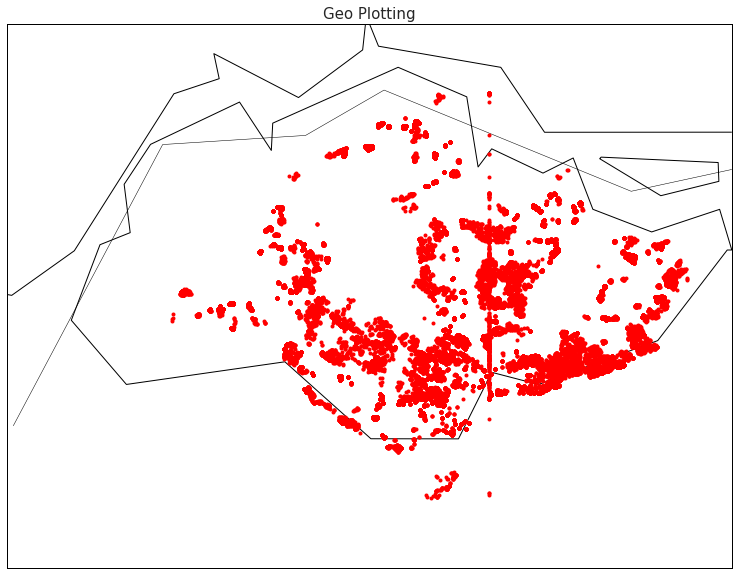

In [1688]:
from mpl_toolkits.basemap import Basemap
cols = ['latitude','longitude']
latlong = train_data_pri[cols]

#latlong = latlong.drop(latlong[(latlong.latitude>1.4) & (latlong.latitude<1.6) & (latlong.longitude>103.6) & (latlong.longitude<103.72)].index)
fig = plt.figure(figsize=(20, 10))
#m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
                #llcrnrlon=100,urcrnrlon=150,resolution='c')
#m = Basemap(projection='merc',llcrnrlat=1.4,urcrnrlat=1.6,
 #           llcrnrlon=103.6, urcrnrlon=103.72, resolution='i', area_thresh=10, lat_0=1.5, lon_0=103)
m = Basemap(projection='merc',llcrnrlat=1.2,urcrnrlat=1.5,\
            llcrnrlon=103.6, urcrnrlon=104, resolution='i', area_thresh=10, lat_0=1.5, lon_0=103)
 
m.drawcoastlines()
m.drawcountries()
m.drawstates()
#m.fillcontinents(color='#04BAE3',lake_color='#FFFFFF')
m.drawmapboundary(fill_color='#FFFFFF')

lons = latlong['longitude'].values
lats = latlong['latitude'].values
x,y = m(lons, lats)
#x,y=m([103.714098,103.714216],[1.348241,1.347004])

 

# r = red; o = circle marker (see: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)
m.plot(x, y, 'ro', markersize=4)


    
plt.title("Geo Plotting")
plt.show()

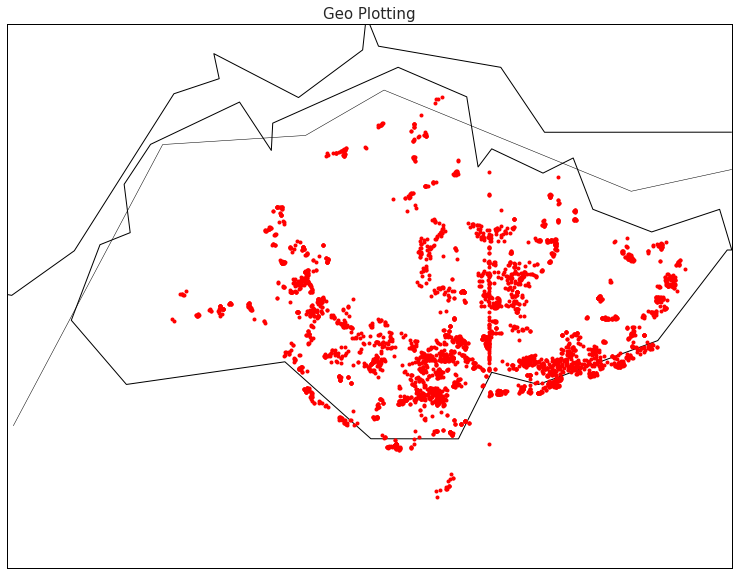

In [1689]:
from mpl_toolkits.basemap import Basemap
cols = ['latitude','longitude']
#latlong = train_data_hdb[cols]
fig = plt.figure(figsize=(20, 10))
#m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
                #llcrnrlon=100,urcrnrlon=150,resolution='c')
m = Basemap(projection='merc',llcrnrlat=1.2,urcrnrlat=1.5,
            llcrnrlon=103.6, urcrnrlon=104, resolution='i', area_thresh=100, lat_0=1.5, lon_0=103)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
#m.fillcontinents(color='#04BAE3',lake_color='#FFFFFF')
m.drawmapboundary(fill_color='#FFFFFF')

lons = test_data_pri['longitude'].values
lats = test_data_pri['latitude'].values
x,y = m(lons, lats)

# r = red; o = circle marker (see: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)
m.plot(x, y, 'ro', markersize=4)


    
plt.title("Geo Plotting")
plt.show()


 mu = 1484150.11 and sigma = 1540555.84



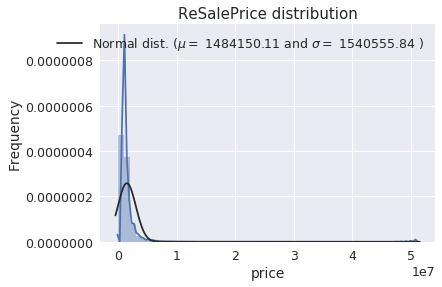

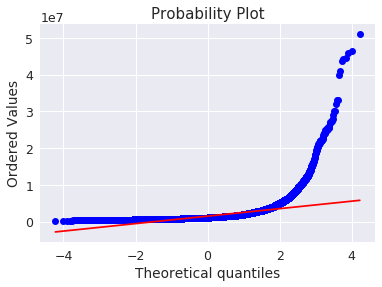

Skewness: 9.320279
Kurtosis: 159.270956


In [1690]:
sns.distplot(train_data_pri['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data_pri['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('ReSalePrice distribution')

fig = plt.figure()
res = stats.probplot(train_data_pri['price'], plot=plt)
plt.show()

print("Skewness: %f" % train_data_pri['price'].skew())
print("Kurtosis: %f" % train_data_pri['price'].kurt())

In [1691]:
train_data_pri['price'].describe()

count    5.714900e+04
mean     1.484150e+06
std      1.540569e+06
min      5.000000e+04
25%      8.420000e+05
50%      1.096000e+06
75%      1.550000e+06
max      5.100000e+07
Name: price, dtype: float64

In [1692]:
ntrain = train_data_pri.shape[0]
ntest = test_data_pri.shape[0]
y_train = train_data_pri.price.values
all_data = pd.concat((train_data_pri, test_data_pri)).reset_index(drop=True)
all_data.drop(['price'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (61182, 19)


In [1693]:
all_data.head()

,address,area,completion_date,contract_date,floor_area_sqm,floor_num,latitude,longitude,month,postal_code,postal_district,postal_sector,project_name,property_type,region,tenure,type_of_land,type_of_sale,unit_num
0,205 Balestier Road #24-04,Novena,2012,30/01/2015,52,24.0,1.320532,103.852460,2015-1,329682,12,32,THE MEZZO,Apartment,Central Region,Freehold,Strata,Resale,4.0
1,2 Ang Mo Kio Central 3 #15-03,Ang Mo Kio,2005,30/01/2015,114,15.0,1.375524,103.846756,2015-1,567741,20,56,GRANDEUR 8,Condominium,North East Region,99 Yrs From 16/07/2002,Strata,Resale,3.0
2,275 Bedok South Avenue 3 #11-26,Bedok,Uncompleted,30/01/2015,57,11.0,1.323568,103.944709,2015-1,465491,16,46,ECO,Condominium,East Region,99 Yrs From 14/05/2012,Strata,New Sale,26.0
3,15 Punggol Field Walk #09-02,Punggol,Uncompleted,30/01/2015,155,9.0,1.390929,103.912165,2015-1,828746,19,82,WATERWOODS,Executive Condominium,North East Region,99 Yrs From 11/03/2013,Strata,New Sale,2.0
4,15 Anchorvale Crescent #13-09,Sengkang,Uncompleted,30/01/2015,116,13.0,1.399079,103.890400,2015-1,544651,19,54,BELLEWATERS,Executive Condominium,North East Region,99 Yrs From 28/08/2013,Strata,New Sale,9.0


In [1694]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
unit_num,7.871596
floor_num,7.871596


In [1695]:
train_missing = (train_data_pri.isnull().sum() / len(train_data_pri)) * 100
train_missing = train_missing.drop(train_missing[train_missing == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_missing})
missing_data

,Missing Ratio
unit_num,7.321213
floor_num,7.321213


In [1696]:
test_missing = (test_data_pri.isnull().sum() / len(test_data_pri)) * 100
test_missing = test_missing.drop(test_missing[test_missing == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :test_missing})
missing_data

,Missing Ratio
unit_num,15.670717
floor_num,15.670717


In [1697]:
train_data_pri[train_data_pri['unit_num'].isnull()]

,project_name,address,floor_area_sqm,type_of_land,price,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,unit_num
128391,N.A.,22A Lorong Biawak,565,Land,4500000,30/01/2015,Terrace House,Freehold,1969,Resale,13,35,358790,North East Region,Serangoon,2015-1,1.348548,103.870136,NaN,NaN
128400,N.A.,167 Tai Keng Gardens,398,Land,3500000,30/01/2015,Semi-Detached House,Freehold,1986,Resale,19,53,535439,North East Region,Hougang,2015-1,1.345976,103.885938,NaN,NaN
128419,FRANKEL ESTATE,22 Burnfoot Terrace,158,Land,3168000,30/01/2015,Terrace House,Freehold,Unknown,Resale,15,45,459814,East Region,Bedok,2015-1,1.312275,103.921968,NaN,NaN
128434,N.A.,2 Jalan Hussein,336,Land,4100000,30/01/2015,Semi-Detached House,Freehold,1973,Resale,14,41,419394,East Region,Bedok,2015-1,1.323990,103.908730,NaN,NaN
128461,THOMSON PARK,38 Jalan Sembilang,265,Land,3168000,29/01/2015,Semi-Detached House,Freehold,Unknown,Resale,20,57,576881,Central Region,Bishan,2015-1,1.356198,103.835014,NaN,NaN
128479,GREEN PARK,35 Jalan Limau Kasturi,182,Land,2580000,29/01/2015,Terrace House,999 Yrs From 01/04/1878,1976,Resale,16,46,468434,East Region,Bedok,2015-1,1.324493,103.945596,NaN,NaN
128496,N.A.,77B Kovan Road,214,Land,2770000,28/01/2015,Terrace House,999 Yrs From 02/12/1878,1991,Resale,19,54,548169,North East Region,Hougang,2015-1,1.355744,103.878647,NaN,NaN
128502,PEIRCE VILLAS,5 Swettenham Road,1416,Land,23520000,28/01/2015,Detached House,Freehold,1997,Resale,10,24,248083,Central Region,Tanglin,2015-1,1.304956,103.805761,NaN,NaN
128519,LOYANG VILLAS,35 Loyang Rise,153,Land,1550000,28/01/2015,Terrace House,99 Yrs From 01/05/1993,1996,Resale,17,50,507566,East Region,Pasir Ris,2015-1,1.361922,103.964040,NaN,NaN
128540,SERANGOON GARDEN ESTATE,62 Bridport Avenue,201,Land,2475000,27/01/2015,Terrace House,999 Yrs From 01/01/1954,Unknown,Resale,19,55,559352,North East Region,Serangoon,2015-1,1.367590,103.864079,NaN,NaN


In [1698]:
train_data_pri.floor_num.describe()

count    52965.000000
mean        10.125120
std          7.805943
min          1.000000
25%          4.000000
50%          8.000000
75%         14.000000
max         74.000000
Name: floor_num, dtype: float64

In [1699]:
train_data_pri.price.describe()

count    5.714900e+04
mean     1.484150e+06
std      1.540569e+06
min      5.000000e+04
25%      8.420000e+05
50%      1.096000e+06
75%      1.550000e+06
max      5.100000e+07
Name: price, dtype: float64

In [1700]:
train_data_pri[train_data_pri['floor_num'].isnull()].price.describe()

count    4.184000e+03
mean     3.762492e+06
std      3.740529e+06
min      5.000000e+04
25%      2.100000e+06
50%      2.800000e+06
75%      3.900000e+06
max      4.638000e+07
Name: price, dtype: float64

In [1701]:
train_data_pri[(train_data_pri['price'] > 3500000) & (train_data_pri['price'] < 4000000)].floor_num.describe()

count    377.000000
mean      12.694960
std       10.551787
min        1.000000
25%        5.000000
50%        9.000000
75%       19.000000
max       67.000000
Name: floor_num, dtype: float64

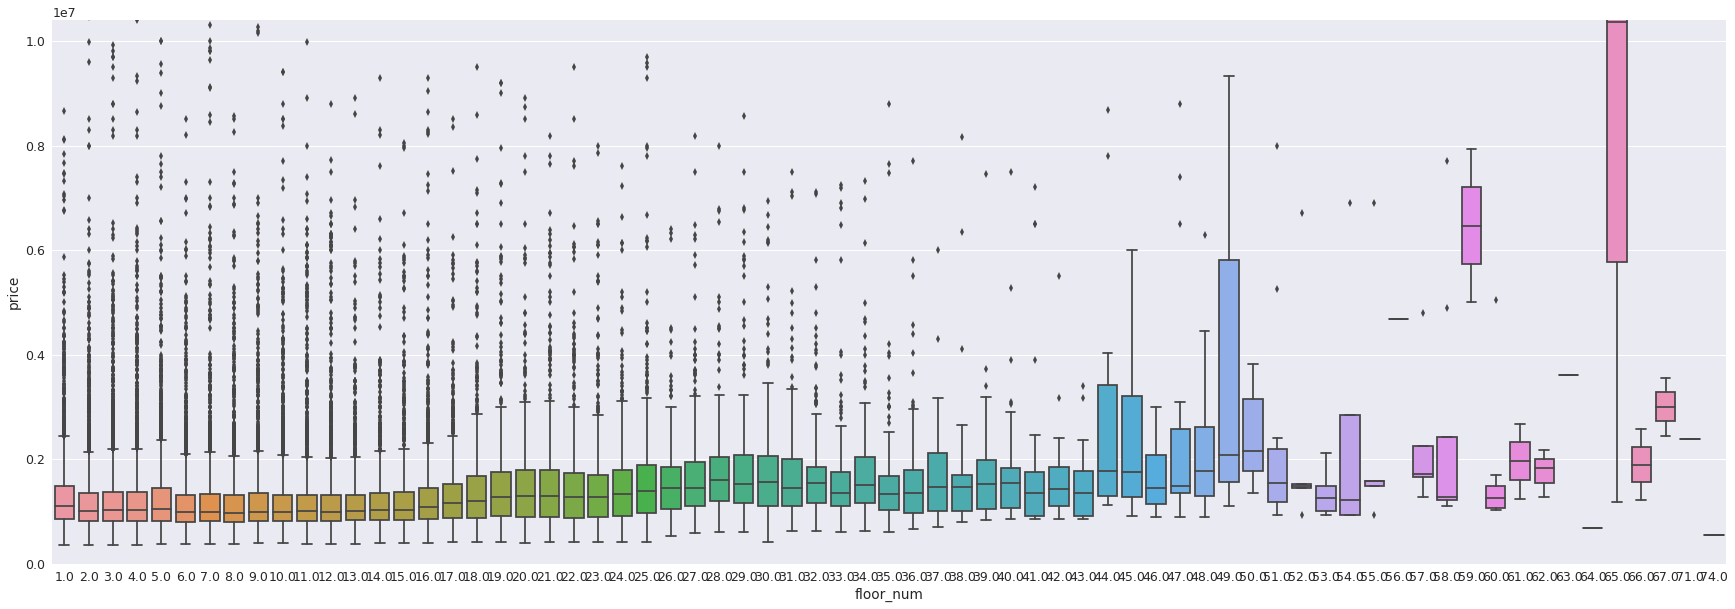

In [1702]:
var = 'floor_num'
data = pd.concat([train_data_pri['price'], train_data_pri[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 10))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=10400000);
plt.show()

In [1703]:
test_data_pri.floor_num.describe()

count    3401.000000
mean        9.045575
std         8.008414
min         1.000000
25%         4.000000
50%         7.000000
75%        12.000000
max        68.000000
Name: floor_num, dtype: float64

In [1704]:
train_data_pri.floor_num = np.where(train_data_pri['floor_num'].isnull(),10,train_data_pri['floor_num'])

In [1705]:
print len(train_data_pri.project_name.unique())
print len(test_data_pri.project_name.unique())

2394
1234


In [1706]:
train_data_pri.head(10)

,project_name,address,floor_area_sqm,type_of_land,price,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,unit_num
128383,THE MEZZO,205 Balestier Road #24-04,52,Strata,795000,30/01/2015,Apartment,Freehold,2012,Resale,12,32,329682,Central Region,Novena,2015-1,1.320532,103.852460,24.0,4.0
128384,GRANDEUR 8,2 Ang Mo Kio Central 3 #15-03,114,Strata,1250000,30/01/2015,Condominium,99 Yrs From 16/07/2002,2005,Resale,20,56,567741,North East Region,Ang Mo Kio,2015-1,1.375524,103.846756,15.0,3.0
128385,ECO,275 Bedok South Avenue 3 #11-26,57,Strata,807540,30/01/2015,Condominium,99 Yrs From 14/05/2012,Uncompleted,New Sale,16,46,465491,East Region,Bedok,2015-1,1.323568,103.944709,11.0,26.0
128386,WATERWOODS,15 Punggol Field Walk #09-02,155,Strata,1325596,30/01/2015,Executive Condominium,99 Yrs From 11/03/2013,Uncompleted,New Sale,19,82,828746,North East Region,Punggol,2015-1,1.390929,103.912165,9.0,2.0
128387,BELLEWATERS,15 Anchorvale Crescent #13-09,116,Strata,1021000,30/01/2015,Executive Condominium,99 Yrs From 28/08/2013,Uncompleted,New Sale,19,54,544651,North East Region,Sengkang,2015-1,1.399079,103.890400,13.0,9.0
128388,FORESTVILLE,38 Woodlands Drive 16 #07-38,100,Strata,819000,30/01/2015,Executive Condominium,99 Yrs From 06/08/2012,Uncompleted,New Sale,25,73,737773,North Region,Woodlands,2015-1,1.432676,103.799291,7.0,38.0
128389,FORESQUE RESIDENCES,107 Petir Road #24-15,178,Strata,1676448,30/01/2015,Condominium,99 Yrs From 10/01/2011,2014,New Sale,23,67,678275,West Region,Bukit Panjang,2015-1,1.369016,103.776425,24.0,15.0
128390,LAKE LIFE,6 Tao Ching Road #12-07,96,Strata,877000,30/01/2015,Executive Condominium,99 Yrs From 30/10/2013,Uncompleted,New Sale,22,61,618723,West Region,Jurong West,2015-1,1.332488,103.724192,12.0,7.0
128391,N.A.,22A Lorong Biawak,565,Land,4500000,30/01/2015,Terrace House,Freehold,1969,Resale,13,35,358790,North East Region,Serangoon,2015-1,1.348548,103.870136,10.0,NaN
128392,NORTHOAKS,20 Woodlands Crescent #12-45,116,Strata,820000,30/01/2015,Executive Condominium,99 Yrs From 16/12/1997,2000,Resale,25,73,738081,North Region,Woodlands,2015-1,1.444650,103.806000,12.0,45.0


In [1707]:
t = train_data_pri.project_name.unique()
t1 = test_data_pri.project_name.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
name_dict={}
for i in range(len(t)):
    name_dict[t[i]] = i+1
#print block_dict

train_data_pri['project_name'] = train_data_pri.project_name.apply(lambda x : name_dict[x])
test_data_pri['project_name'] = test_data_pri.project_name.apply(lambda x : name_dict[x])

2462 1234
['# 1 LOFT' '# 1 SUITES' '1 CANBERRA' ..., 'ZEDGE' 'ZENITH' 'ZEPHYR PARK'] ["D'LEEDON" 'MERGUI MANSIONS' 'MIMOSA PARK' ..., 'PINNACLE 16'
 'BALMORAL POINT' 'STUDIO 3']


In [1708]:
print len(train_data_pri.address.unique())
print len(test_data_pri.address.unique())

56707
4033


In [1709]:
print train_data_pri.shape
#train_data_pri= train_data_pri.drop(train_data_pri[train_data_pri.address == 'n'].index)
print train_data_pri.shape

(57149, 20)
(57149, 20)


In [1710]:
##t = train_data_pri.address.unique()
##t1 = test_data_pri.address.unique()
#t = t + t1
##t = np.append(t,t1)
#t = t.unique()
##t = np.unique(t)
##t.sort()
##print len(t),len(t1)
##print t,t1
##address_dict={}
##for i in range(len(t)):
    ##address_dict[t[i]] = i+1
#print block_dict

##train_data_pri['address'] = train_data_pri.address.apply(lambda x : address_dict[x])
##test_data_pri['address'] = test_data_pri.address.apply(lambda x : address_dict[x])

In [1711]:
t = train_data_pri.type_of_land.unique()
t1 = test_data_pri.type_of_land.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
landtype_dict={}
for i in range(len(t)):
    landtype_dict[t[i]] = i+1
#print block_dict

train_data_pri['type_of_land'] = train_data_pri.type_of_land.apply(lambda x : landtype_dict[x])
test_data_pri['type_of_land'] = test_data_pri.type_of_land.apply(lambda x : landtype_dict[x])

2 2
['Land' 'Strata'] ['Strata' 'Land']


In [1712]:
train_data_pri.contract_date = train_data_pri.contract_date.apply(lambda x : x.replace("-",""))
test_data_pri.contract_date = test_data_pri.contract_date.apply(lambda x : x.replace("-",""))
print train_data_pri.contract_date.unique()
print test_data_pri.contract_date.unique()

t = train_data_pri.contract_date.unique()
t1 = test_data_pri.contract_date.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
#print t,t1
contract_dict={}
for i in range(len(t)):
    contract_dict[t[i]] = i+1
#print block_dict

train_data_pri['contract_date'] = train_data_pri.contract_date.apply(lambda x : contract_dict[x])
test_data_pri['contract_date'] = test_data_pri.contract_date.apply(lambda x : contract_dict[x])


[u'30/01/2015' u'29/01/2015' u'28/01/2015' u'27/01/2015' u'26/01/2015'
 u'25/01/2015' u'23/01/2015' u'22/01/2015' u'21/01/2015' u'20/01/2015'
 u'19/01/2015' u'17/01/2015' u'16/01/2015' u'15/01/2015' u'14/01/2015'
 u'13/01/2015' u'12/01/2015' u'10/01/2015' u'09/01/2015' u'08/01/2015'
 u'07/01/2015' u'06/01/2015' u'05/01/2015' u'02/01/2015' u'28/02/2015'
 u'27/02/2015' u'26/02/2015' u'25/02/2015' u'24/02/2015' u'23/02/2015'
 u'21/02/2015' u'19/02/2015' u'18/02/2015' u'17/02/2015' u'16/02/2015'
 u'13/02/2015' u'12/02/2015' u'11/02/2015' u'10/02/2015' u'09/02/2015'
 u'06/02/2015' u'05/02/2015' u'04/02/2015' u'03/02/2015' u'02/02/2015'
 u'31/03/2015' u'30/03/2015' u'27/03/2015' u'26/03/2015' u'25/03/2015'
 u'24/03/2015' u'23/03/2015' u'20/03/2015' u'19/03/2015' u'18/03/2015'
 u'17/03/2015' u'16/03/2015' u'13/03/2015' u'12/03/2015' u'11/03/2015'
 u'10/03/2015' u'09/03/2015' u'08/03/2015' u'07/03/2015' u'06/03/2015'
 u'05/03/2015' u'04/03/2015' u'03/03/2015' u'02/03/2015' u'30/04/2015'
 u'29/

In [1713]:
t = train_data_pri.property_type.unique()
t1 = test_data_pri.property_type.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
proptype_dict={}
for i in range(len(t)):
    proptype_dict[t[i]] = i+1
#print block_dict

train_data_pri['property_type'] = train_data_pri.property_type.apply(lambda x : proptype_dict[x])
test_data_pri['property_type'] = test_data_pri.property_type.apply(lambda x : proptype_dict[x])

6 6
['Apartment' 'Condominium' 'Detached House' 'Executive Condominium'
 'Semi-Detached House' 'Terrace House'] ['Condominium' 'Apartment' 'Terrace House' 'Semi-Detached House'
 'Detached House' 'Executive Condominium']


In [1714]:
t = train_data_pri.type_of_sale.unique()
t1 = test_data_pri.type_of_sale.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
typesale_dict={}
for i in range(len(t)):
    typesale_dict[t[i]] = i+1
#print block_dict

train_data_pri['type_of_sale'] = train_data_pri.type_of_sale.apply(lambda x : typesale_dict[x])
test_data_pri['type_of_sale'] = test_data_pri.type_of_sale.apply(lambda x : typesale_dict[x])

3 1
['New Sale' 'Resale' 'Sub Sale'] ['Resale']


In [1715]:
train_data_pri.month = train_data_pri.month.apply(lambda x : x.replace("-",""))
test_data_pri.month = test_data_pri.month.apply(lambda x : x.replace("-",""))
print train_data_pri.month.unique()
print test_data_pri.month.unique()

t = train_data_pri.month.unique()
t1 = test_data_pri.month.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
#print t,t1
month_dict={}
for i in range(len(t)):
    month_dict[t[i]] = i+1
#print block_dict

train_data_pri['month'] = train_data_pri.month.apply(lambda x : month_dict[x])
test_data_pri['month'] = test_data_pri.month.apply(lambda x : month_dict[x])

['20151' '20152' '20153' '20154' '20155' '20156' '20157' '20158' '20159'
 '201510' '201511' '201512' '20161' '20162' '20163' '20164' '20165' '20166'
 '20167' '20168' '20169' '201610' '201611' '201612' '20171' '20172' '20173'
 '20174' '20175' '20176' '20177' '20178']
['20179' '201710' '201711']
35 3


In [1716]:
def count_remaining_years(row):
    current_year = datetime.today().year
    tenure_years = int(row["tenure_year"])
    tenure_start = row["tenure_start_date"].year
    tenure_end = row["tenure_start_date"].year + tenure_years
    tenure_remain =  tenure_end - current_year
    return tenure_remain

In [1717]:
blocks_streets_units = train_data_pri.address.str.split("#")
blocks_streets = blocks_streets_units.str.get(0)
splitted_blocks_streets = blocks_streets.str.split(" ", 1)
blocks = splitted_blocks_streets.str.get(0)
streets = splitted_blocks_streets.str.get(1)
train_data_pri["address_block"] = blocks
train_data_pri["address_street"] = streets 

In [1718]:
train_data_pri.address.head(100)

128383          205 Balestier Road  #24-04 
128384      2 Ang Mo Kio Central 3  #15-03 
128385    275 Bedok South Avenue 3  #11-26 
128386       15 Punggol Field Walk  #09-02 
128387      15 Anchorvale Crescent  #13-09 
128388       38 Woodlands Drive 16  #07-38 
128389              107 Petir Road  #24-15 
128390            6 Tao Ching Road  #12-07 
128391                   22A Lorong Biawak 
128392       20 Woodlands Crescent  #12-45 
128393        937 Bukit Timah Road  #04-35 
128394        8 Tampines Street 73  #05-01 
128395          60 Jalan Mata Ayer  #04-11 
128396           12 Tao Ching Road  #16-30 
128397           147 Killiney Road  #06-05 
128398          86 Edgedale Plains  #15-15 
128399         7 One-North Gateway  #10-09 
128400                167 Tai Keng Gardens 
128401         1 Lorong 20 Geylang  #06-15 
128402       22 Woodlands Drive 16  #02-07 
128403      20 Ang Mo Kio Avenue 2  #06-37 
128404       40 Woodlands Drive 16  #10-40 
128405              21 Nathan Ro

In [1719]:
train_data_pri.address_block.unique()

array(['205', '2', '275', ..., '42B', '63F', '828'], dtype=object)

In [1720]:
train_data_pri.address_street.unique()

array(['Balestier Road  ', 'Ang Mo Kio Central 3  ',
       'Bedok South Avenue 3  ', ..., 'Beatty Road ', 'Jalan Melati ',
       'Mountbatten Road '], dtype=object)

In [1721]:
blocks_streets_units = test_data_pri.address.str.split("#")
blocks_streets = blocks_streets_units.str.get(0)
splitted_blocks_streets = blocks_streets.str.split(" ", 1)
blocks = splitted_blocks_streets.str.get(0)
streets = splitted_blocks_streets.str.get(1)
test_data_pri["address_block"] = blocks
test_data_pri["address_street"] = streets

In [1722]:
test_data_pri.address_street.unique()

array(['Leedon Heights  ', 'Mergui Road  ', 'Mimosa Road  ',
       'Pasir Ris Grove  ', 'River Valley Road  ', 'Serangoon Avenue 3  ',
       'Springside Avenue ', 'Tanjong Rhu Road  ', 'Tavistock Avenue ',
       'Upper Serangoon Crescent  ', 'Woodgrove Drive  ',
       'Balmoral Road  ', 'Bayshore Road  ', 'Bishan Street 25  ',
       'Bukit Timah Road  ', 'Dover Rise  ', 'Duchess Avenue  ',
       'Dunearn Road  ', 'Flora Drive  ', 'Geylang Road  ',
       'Hougang Street 92  ', 'Jalan Krian ', 'Joo Chiat Place ',
       'Keppel Bay Drive  ', 'Kovan Road  ', 'Keppel Bay View  ',
       'Kim Yam Road  ', 'Lorong Marican ', 'Mandalay Road  ',
       'Pasir Ris Link  ', 'Peck Hay Road  ',
       'Ponggol Twenty-Fourth Avenue ', 'Robertson Quay  ',
       'Siglap Road  ', 'Tampines Avenue 1  ', 'Telok Blangah Road  ',
       'Thomson Road  ', 'Trevose Crescent  ', 'Whampoa East ',
       'Woo Mon Chew Road ', 'Amber Gardens  ', 'Amber Road  ',
       'Ang Mo Kio Avenue 8  ', 'Bishan St

In [1723]:
train_data_pri['completion_date'] = train_data_pri.completion_date.apply(lambda x : x.split("/")[2] if "/" in x else x )

t = train_data_pri.completion_date.unique()
t1 = test_data_pri.completion_date.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
completion_dict={}
for i in range(len(t)):
    completion_dict[t[i]] = i+1
#print block_dict

train_data_pri['completion_date'] = train_data_pri.completion_date.apply(lambda x : completion_dict[x])
test_data_pri['completion_date'] = test_data_pri.completion_date.apply(lambda x : completion_dict[x])

77 64
['1929' '1930' '1932' '1938' '1939' '1941' '1948' '1950' '1951' '1952'
 '1953' '1954' '1955' '1956' '1957' '1958' '1959' '1960' '1961' '1962'
 '1963' '1964' '1965' '1966' '1967' '1968' '1969' '1970' '1971' '1972'
 '1973' '1974' '1975' '1976' '1977' '1978' '1979' '1980' '1981' '1982'
 '1983' '1984' '1985' '1986' '1987' '1988' '1989' '1990' '1991' '1992'
 '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002'
 '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012'
 '2013' '2014' '2015' '2016' '2017' 'Uncompleted' 'Unknown'] ['2014' '1995' '1979' '2015' '2016' '1992' '1998' '1986' '2011' '2010'
 '2000' '2012' '2001' '1999' '1968' '2004' '2006' 'Unknown' '2005' '2009'
 '1975' '2013' '1996' '1997' '1991' '1994' '2002' '1982' '2008' '2007'
 '1987' '1978' '1983' '1984' '1972' '1990' '1993' '1971' '2003' '1969'
 '1985' '1989' '2017' '1980' '1976' '1956' '1988' '1967' '1958' '1957'
 '1955' '1977' '1960' '1966' '1965' '1961' '1974' '1953' '1941' '1970'
 '1981'

In [1724]:
t = train_data_pri.address_block.unique()
t1 = test_data_pri.address_block.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
address_block_dict={}
for i in range(len(t)):
    address_block_dict[t[i]] = i+1
#print block_dict

train_data_pri['address_block'] = train_data_pri.address_block.apply(lambda x : address_block_dict[x])
test_data_pri['address_block'] = test_data_pri.address_block.apply(lambda x : address_block_dict[x])

1306 572
['01' '02' '03' ..., '9H' '9K' '9P'] ['11' '81' '43' '115' '469' '135' '204' '3' '39A' '10' '1A' '66' '2' '941'
 '6' '50' '966' '538' '12' '355' '5' '46' '1' '19' '42' '21' '14' '78' '75'
 '17' '92' '138' '87' '120' '181' '68' '376' '42A' '9' '59' '7' '40' '20'
 '47' '210' '222' '97A' '33' '57' '132A' '51' '22B' '103A' '65' '8' '253A'
 '206' '165' '49' '130' '8D' '101' '53' '11A' '700' '27B' '285' '83' '26A'
 '884' '26' '128' '32G' '201' '29' '995' '48' '985' '52' '140' '37' '34'
 '295' '172' '151' '121' '333' '99' '25A' '221' '30' '124' '357' '507' '22'
 '50E' '23' '38' '73' '18' '69' '60' '4' '41' '552' '103' '187' '152' '11D'
 '77' '503' '91' '64' '28' '261' '967' '79' '90' '39' '200' '1C' '38A' '61'
 '156' '708' '461A' '93' '132' '214' '224' '113' '29A' '31' '460' '25'
 '208' '95' '158' '97' '119' '150' '245' '144' '202' '81B' '116' '2D' '27'
 '25C' '85' '30A' '331' '15' '520' '76' '281' '1001' '55B' '45' '263' '18A'
 '105' '190' '149' '117' '495' '356' '11F' '143' '89' '6

In [1725]:
t = train_data_pri.address_street.unique()
t1 = test_data_pri.address_street.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
address_street_dict={}
for i in range(len(t)):
    address_street_dict[t[i]] = i+1
#print block_dict

train_data_pri['address_street'] = train_data_pri.address_street.apply(lambda x : address_street_dict[x])
test_data_pri['address_street'] = test_data_pri.address_street.apply(lambda x : address_street_dict[x])

2077 965
['Adam Road  ' 'Adis Road  ' 'Ah Hood Road  ' ..., 'Zehnder Road  '
 'Zion Close  ' 'Zion Road  '] ['Leedon Heights  ' 'Mergui Road  ' 'Mimosa Road  ' 'Pasir Ris Grove  '
 'River Valley Road  ' 'Serangoon Avenue 3  ' 'Springside Avenue '
 'Tanjong Rhu Road  ' 'Tavistock Avenue ' 'Upper Serangoon Crescent  '
 'Woodgrove Drive  ' 'Balmoral Road  ' 'Bayshore Road  '
 'Bishan Street 25  ' 'Bukit Timah Road  ' 'Dover Rise  '
 'Duchess Avenue  ' 'Dunearn Road  ' 'Flora Drive  ' 'Geylang Road  '
 'Hougang Street 92  ' 'Jalan Krian ' 'Joo Chiat Place '
 'Keppel Bay Drive  ' 'Kovan Road  ' 'Keppel Bay View  ' 'Kim Yam Road  '
 'Lorong Marican ' 'Mandalay Road  ' 'Pasir Ris Link  ' 'Peck Hay Road  '
 'Ponggol Twenty-Fourth Avenue ' 'Robertson Quay  ' 'Siglap Road  '
 'Tampines Avenue 1  ' 'Telok Blangah Road  ' 'Thomson Road  '
 'Trevose Crescent  ' 'Whampoa East ' 'Woo Mon Chew Road '
 'Amber Gardens  ' 'Amber Road  ' 'Ang Mo Kio Avenue 8  '
 'Bishan Street 15  ' 'Bodmin Drive ' 'Canbe

In [1726]:
train_data_pri.tenure = train_data_pri.tenure.str.strip()
train_data_pri.tenure = train_data_pri.tenure.apply(lambda x : x.split(" ")[0] if "Y" in x else x )
train_data_pri.tenure =  train_data_pri.tenure.apply(lambda x : 'Freehold' if x == 'Freehols' else x )

In [1727]:
test_data_pri.tenure = test_data_pri.tenure.str.strip()
test_data_pri.tenure = test_data_pri.tenure.apply(lambda x : x.split(" ")[0] if "Y" in x else x )
test_data_pri.tenure =  test_data_pri.tenure.apply(lambda x : 'Freehold' if x == 'Freehols' else x )

In [1728]:
train_data_pri.tenure.unique()

array(['Freehold', '99', '999', '103', '101', '947', '956', '929', '946',
       '9999', '100', '102', '70', '104', 'N.A.', '940', '60', '85', '998',
       '993', '945', '89'], dtype=object)

In [1729]:
test_data_pri.tenure.unique()

array(['99', 'Freehold', '999', '103', '956', '946', '9999', '929', '102',
       '85', '947', '998'], dtype=object)

In [1730]:
t = train_data_pri.tenure.unique()
t1 = test_data_pri.tenure.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
tenure_dict={}
for i in range(len(t)):
    tenure_dict[t[i]] = i+1
#print block_dict

train_data_pri['tenure'] = train_data_pri.tenure.apply(lambda x : tenure_dict[x])
test_data_pri['tenure'] = test_data_pri.tenure.apply(lambda x : tenure_dict[x])

22 12
['100' '101' '102' '103' '104' '60' '70' '85' '89' '929' '940' '945' '946'
 '947' '956' '99' '993' '998' '999' '9999' 'Freehold' 'N.A.'] ['99' 'Freehold' '999' '103' '956' '946' '9999' '929' '102' '85' '947'
 '998']


In [1731]:
t = train_data_pri.area.unique()
t1 = test_data_pri.area.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
area_dict={}
for i in range(len(t)):
    area_dict[t[i]] = i+1
#print block_dict

train_data_pri['area'] = train_data_pri.area.apply(lambda x : area_dict[x])
test_data_pri['area'] = test_data_pri.area.apply(lambda x : area_dict[x])

40 38
['Ang Mo Kio' 'Bedok' 'Bishan' 'Bukit Batok' 'Bukit Merah' 'Bukit Panjang'
 'Bukit Timah' 'Changi  ' 'Choa Chu Kang' 'Clementi' 'Downtown Core'
 'Geylang' 'Hougang' 'Jurong East' 'Jurong West' 'Kallang' 'Mandai'
 'Marine Parade' 'Museum' 'Newton' 'Novena' 'Orchard' 'Outram' 'Pasir Ris'
 'Paya Lebar' 'Punggol' 'Queenstown' 'River Valley' 'Rochor' 'Sembawang'
 'Sengkang' 'Serangoon' 'Singapore River' 'Southern Islands' 'Sungei Kadut'
 'Tampines' 'Tanglin' 'Toa Payoh' 'Woodlands' 'Yishun'] ['Bukit Timah' 'Kallang' 'Serangoon' 'Pasir Ris' 'Tanglin' 'Yishun'
 'Hougang' 'Woodlands' 'Bedok' 'Bishan' 'Queenstown' 'Geylang'
 'Bukit Merah' 'River Valley' 'Novena' 'Newton' 'Punggol' 'Singapore River'
 'Tampines' 'Marine Parade' 'Ang Mo Kio' 'Choa Chu Kang' 'Bukit Batok'
 'Museum' 'Sembawang' 'Downtown Core' 'Jurong East' 'Toa Payoh' 'Rochor'
 'Southern Islands' 'Bukit Panjang' 'Sengkang' 'Clementi' 'Jurong West'
 'Outram' 'Orchard' 'Mandai' 'Changi  ']


In [1732]:
t = train_data_pri.postal_code.unique()
t1 = test_data_pri.postal_code.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
postal_dict={}
for i in range(len(t)):
    postal_dict[t[i]] = i+1
#print block_dict

train_data_pri['postal_code'] = train_data_pri.postal_code.apply(lambda x : postal_dict[x])
test_data_pri['postal_code'] = test_data_pri.postal_code.apply(lambda x : postal_dict[x])

9351 2516
[ 18965  18978  18980 ..., 829731 829753 829755] [267955 219057 808005 ..., 248196 545040 588996]


In [1733]:
t = train_data_pri.region.unique()
t1 = test_data_pri.region.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
region_dict={}
for i in range(len(t)):
    region_dict[t[i]] = i+1
#print block_dict

train_data_pri['region'] = train_data_pri.region.apply(lambda x : region_dict[x])
test_data_pri['region'] = test_data_pri.region.apply(lambda x : region_dict[x])

5 5
['Central Region' 'East Region' 'North East Region' 'North Region'
 'West Region'] ['Central Region' 'North East Region' 'East Region' 'North Region'
 'West Region']


In [1734]:
t = train_data_pri.latitude.unique()
t1 = test_data_pri.latitude.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
lat_dict={}
for i in range(len(t)):
    lat_dict[t[i]] = i+1
#print block_dict

train_data_pri['latitude'] = train_data_pri.latitude.apply(lambda x : lat_dict[x])
test_data_pri['latitude'] = test_data_pri.latitude.apply(lambda x : lat_dict[x])

10607 2423
[ 1.23865052  1.23922338  1.23922338 ...,  1.46205263  1.46206902
  1.46210218] [ 1.31621028  1.31717013  1.3833584  ...,  1.29571275  1.38021727
  1.33863165]


In [1735]:
t = train_data_pri.longitude.unique()
t1 = test_data_pri.longitude.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
long_dict={}
for i in range(len(t)):
    long_dict[t[i]] = i+1
#print block_dict

train_data_pri['longitude'] = train_data_pri.longitude.apply(lambda x : long_dict[x])
test_data_pri['longitude'] = test_data_pri.longitude.apply(lambda x : long_dict[x])

9996 2343
[ 103.6908931  103.6911401  103.6911497 ...,  103.9753514  103.9754185
  103.9755353] [ 103.80438833  103.85168183  103.86245702 ...,  103.8275808   103.89985746
  103.77858543]


In [1736]:
train_data_pri.head()

,project_name,address,floor_area_sqm,type_of_land,price,contract_date,property_type,tenure,completion_date,type_of_sale,...,postal_code,region,area,month,latitude,longitude,floor_num,unit_num,address_block,address_street
128383,2076,205 Balestier Road #24-04,52,2,795000,964,1,21,70,2,...,2434,1,21,1,3922,4877,24.0,4.0,329,42
128384,766,2 Ang Mo Kio Central 3 #15-03,114,2,1250000,964,2,16,63,2,...,6658,3,1,1,8822,4589,15.0,3.0,319,27
128385,570,275 Bedok South Avenue 3 #11-26,57,2,807540,964,2,16,76,1,...,4366,2,2,1,4444,9188,11.0,26.0,470,74
128386,2399,15 Punggol Field Walk #09-02,155,2,1325596,964,4,16,76,1,...,9292,3,26,1,9766,8157,9.0,2.0,176,1545
128387,166,15 Anchorvale Crescent #13-09,116,2,1021000,964,4,16,76,1,...,5892,3,31,1,9960,7044,13.0,9.0,176,17


In [1737]:
test_data_pri.head()

,project_name,address,floor_area_sqm,type_of_land,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,...,postal_code,region,area,month,latitude,longitude,floor_num,unit_num,address_block,address_street
0,478,11 Leedon Heights #06-31,92,2,955,2,16,72,2,10,...,1561,1,7,35,3248,2146,6.0,31.0,56,1049
1,1175,81 Mergui Road #03-02,129,2,955,1,21,53,2,8,...,682,1,16,35,3422,4849,3.0,2.0,1159,1302
2,1188,43 Mimosa Road #03-49,176,2,955,2,21,37,2,28,...,9148,3,32,35,9402,5195,3.0,49.0,772,1318
3,2100,115 Pasir Ris Grove #03-42,46,2,955,2,16,73,2,18,...,5161,2,24,35,8481,9218,3.0,42.0,70,1459
4,1585,469 River Valley Road #07-30,120,2,955,2,19,73,2,10,...,1037,1,37,35,621,3145,7.0,30.0,822,1580


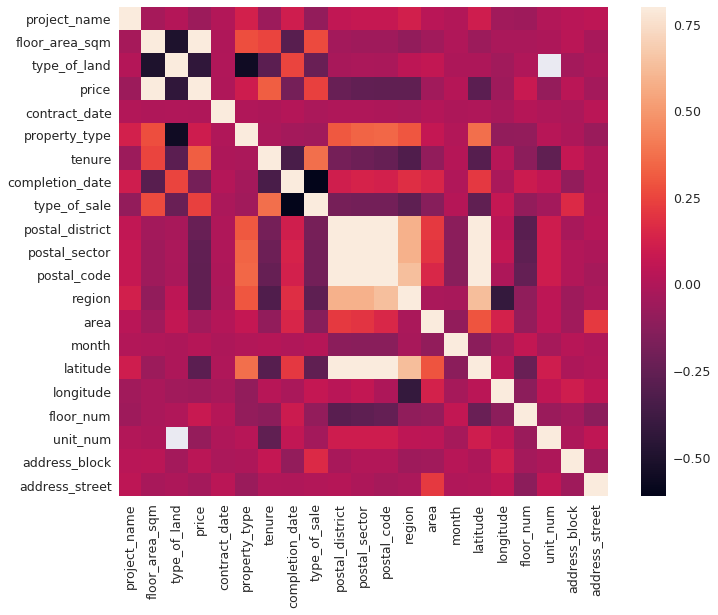

In [1738]:
corrmat = train_data_pri.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

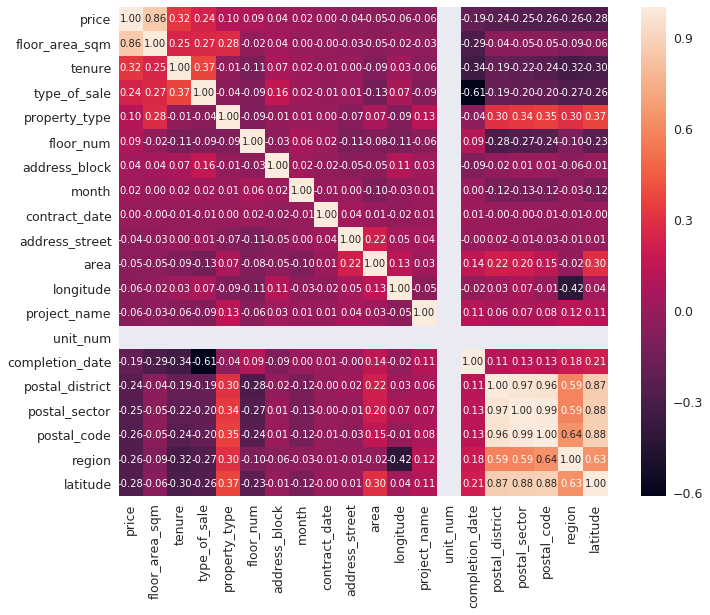

In [1739]:
cols = corrmat.nlargest(20, 'price')['price'].index
cm = np.corrcoef(train_data_pri[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [1740]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,price
1,floor_area_sqm
2,tenure
3,type_of_sale
4,property_type
5,floor_num
6,address_block
7,month
8,contract_date
9,address_street


In [1741]:
train_data_pri = train_data_pri.drop(['unit_num'],axis=1)
train_data_pri = train_data_pri.drop(['address'],axis=1)
#train_data_pri = train_data_pri.drop(['project_name'],axis=1)
#train_data_pri = train_data_pri.drop(['contract_date'],axis=1)
#train_data_pri = train_data_pri.drop(['type_of_land'],axis=1)
#train_data_pri = train_data_pri.drop(['type_of_sale'],axis=1)
#train_data_pri = train_data_pri.drop(['region'],axis=1)
train_data_pri.head()

,project_name,floor_area_sqm,type_of_land,price,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,address_block,address_street
128383,2076,52,2,795000,964,1,21,70,2,12,32,2434,1,21,1,3922,4877,24.0,329,42
128384,766,114,2,1250000,964,2,16,63,2,20,56,6658,3,1,1,8822,4589,15.0,319,27
128385,570,57,2,807540,964,2,16,76,1,16,46,4366,2,2,1,4444,9188,11.0,470,74
128386,2399,155,2,1325596,964,4,16,76,1,19,82,9292,3,26,1,9766,8157,9.0,176,1545
128387,166,116,2,1021000,964,4,16,76,1,19,54,5892,3,31,1,9960,7044,13.0,176,17


In [1743]:
train_original = train_data_pri.copy()
y_original = train_data_pri.price.values.copy()


 mu = 14.02 and sigma = 0.54



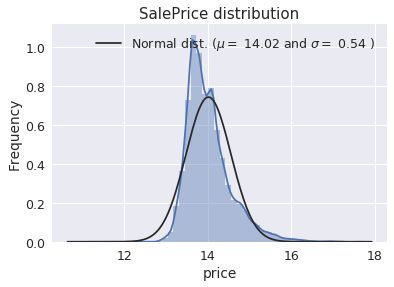

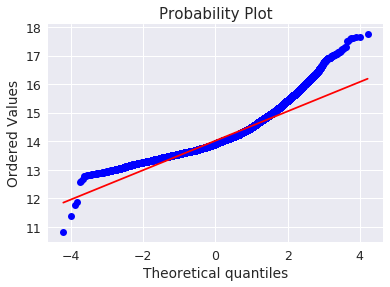

Skewness: 1.353508
Kurtosis: 3.052991


In [1744]:
from scipy.special import boxcox1p, inv_boxcox1p
#train_data_hdb["resale_price"] = np.log1p(train_data_hdb["resale_price"])

train_data_pri['price'] = boxcox1p(train_data_pri['price'], 0)
#tst = boxcox1p(train_data_pri['price'], 0)
#Check the new distribution 
sns.distplot(train_data_pri['price'], fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data_pri['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train_data_pri['price'], plot=plt)
plt.show()

#y_train = train_data_hdb["resale_price"].values

print("Skewness: %f" % train_data_pri['price'].skew())
print("Kurtosis: %f" % train_data_pri['price'].kurt())

In [1745]:
trainY = train_data_pri.price.values
print trainY
train_data_pri = train_data_pri.drop(['price'],axis=1)
train_data_pri.head()

[ 13.58609865  14.03865491  13.60174911 ...,  13.57978949  14.38082494
  13.50490235]


,project_name,floor_area_sqm,type_of_land,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,address_block,address_street
128383,2076,52,2,964,1,21,70,2,12,32,2434,1,21,1,3922,4877,24.0,329,42
128384,766,114,2,964,2,16,63,2,20,56,6658,3,1,1,8822,4589,15.0,319,27
128385,570,57,2,964,2,16,76,1,16,46,4366,2,2,1,4444,9188,11.0,470,74
128386,2399,155,2,964,4,16,76,1,19,82,9292,3,26,1,9766,8157,9.0,176,1545
128387,166,116,2,964,4,16,76,1,19,54,5892,3,31,1,9960,7044,13.0,176,17


In [1746]:
train_data_pri.shape

(57149, 19)

In [1747]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [1748]:
np.random.seed(13)
test_size = .1
X_train, X_test, y_train, y_test = train_test_split(train_data_pri, trainY, test_size = test_size)
print X_train.shape, y_train.shape, X_test.shape, y_test.shape

(51434, 19) (51434,) (5715, 19) (5715,)


In [1749]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=15, 
                             min_child_weight=1.5, n_estimators=2500,
                             reg_alpha=0.8, reg_lambda=0.7,
                             subsample=0.2, silent=1,
                             random_state =13)

In [1750]:
n_folds = 10
kf = KFold(n_folds, shuffle=True, random_state=13).get_n_splits(X_train.values)
map_metrics= -cross_val_score(model_xgb, X_train.values, y_train, scoring="neg_mean_absolute_error", cv = kf)
#rmse= np.sqrt(-cross_val_score(model_xgb, train_data_hdb.values, trainY, scoring="neg_mean_squared_error", cv = kf))
print map_metrics


[ 0.04594897  0.04372425  0.04479519  0.04378082  0.04372209  0.04461514
  0.04358125  0.04372275  0.04393792  0.0450633 ]


In [1751]:
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.0, learning_rate=0.05,
       max_delta_step=0, max_depth=15, min_child_weight=1.5, missing=None,
       n_estimators=2500, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=13, reg_alpha=0.8, reg_lambda=0.7, scale_pos_weight=1,
       seed=None, silent=1, subsample=0.2)

In [1752]:
pred_train = model_xgb.predict(X_train)

In [1753]:
np.mean(np.abs((y_train - pred_train) / y_train)) * 100

0.23401994168935195

In [1754]:
pred_test = model_xgb.predict(X_test)

In [1755]:
np.mean(np.abs((y_test - pred_test) / y_test)) * 100

0.31238035712870826

In [1756]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=10, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [1757]:
def mse_cv(model):
    kfold = KFold(10, shuffle=True, random_state=13).get_n_splits(X_train.values)
    metrics= -cross_val_score(model, X_train.values, y_train, scoring="neg_mean_absolute_error", cv = kfold)
    return(metrics)

In [1758]:
print("GBoost",mse_cv(GBoost))

('GBoost', array([ 0.03787209,  0.03758257,  0.03666556,  0.03615143,  0.03572253,
        0.03747937,  0.0357965 ,  0.03569366,  0.03638226,  0.03750503]))


In [1759]:
GBoost.fit(X_train,y_train)
pred_Gboost = GBoost.predict(X_train)
np.mean(np.abs((y_train - pred_Gboost) / y_train)) * 100

0.10005345833555788

In [1760]:
pred_test_gboost = GBoost.predict(X_test)
np.mean(np.abs((y_test - pred_test_gboost) / y_test)) * 100

0.25873437751838291

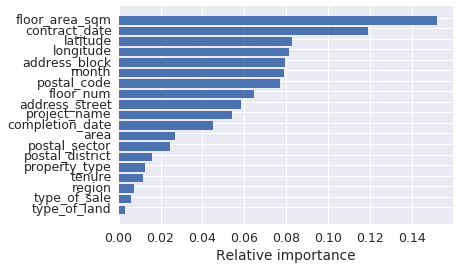

In [1761]:
indices = np.argsort(GBoost.feature_importances_)

# plot as bar chart
names=list(X_train)
plt.barh(np.arange(len(names)), GBoost.feature_importances_[indices])

plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])

_ = plt.xlabel('Relative importance')

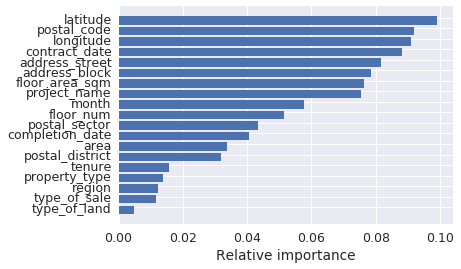

In [1762]:
indices = np.argsort(model_xgb.feature_importances_)

# plot as bar chart
names=list(X_train)
plt.barh(np.arange(len(names)), model_xgb.feature_importances_[indices])

plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])

_ = plt.xlabel('Relative importance')

In [1763]:
np.random.seed(13)
test_size = .1

print train_original.head()
print y_original
train_original = train_original.drop(['price'],axis=1)
X_tr, X_te, y_tr, y_te = train_test_split(train_original, y_original, test_size = test_size)
print X_tr.shape, y_tr.shape, X_te.shape, y_te.shape

        project_name  floor_area_sqm  type_of_land    price  contract_date  \
128383          2076              52             2   795000            964   
128384           766             114             2  1250000            964   
128385           570              57             2   807540            964   
128386          2399             155             2  1325596            964   
128387           166             116             2  1021000            964   

        property_type  tenure  completion_date  type_of_sale  postal_district  \
128383              1      21               70             2               12   
128384              2      16               63             2               20   
128385              2      16               76             1               16   
128386              4      16               76             1               19   
128387              4      16               76             1               19   

        postal_sector  postal_code  region  

In [1764]:
pred_inv = inv_boxcox1p(pred_train, 0)

In [1765]:
np.mean(np.abs((y_tr - pred_inv) / y_tr)) * 100

3.3199305792257663

In [1766]:
pred_test_inv =inv_boxcox1p(pred_test, 0)
np.mean(np.abs((y_te - pred_test_inv) / y_te)) * 100

4.5449479917739213

In [1767]:
pred_inv_gboost = inv_boxcox1p(pred_Gboost, 0)
print pred_inv_gboost

[  916441.80001528  4250997.74891364  1014657.52304382 ...,
  1750848.89319466  2482091.4185043   1114149.21453616]


In [1768]:
np.mean(np.abs((y_tr - pred_inv_gboost) / y_tr)) * 100

1.4178632114887462

In [1769]:
pred_test_binv =inv_boxcox1p(pred_test_gboost, 0)
np.mean(np.abs((y_te - pred_test_binv) / y_te)) * 100

3.9246233840313893

In [1770]:
test_data_pri = test_data_pri.drop(['unit_num'],axis=1)
test_data_pri = test_data_pri.drop(['address'],axis=1)
#test_data_pri = test_data_pri.drop(['project_name'],axis=1)
#test_data_pri = test_data_pri.drop(['contract_date'],axis=1)
#test_data_pri = test_data_pri.drop(['type_of_land'],axis=1)
#test_data_pri = test_data_pri.drop(['type_of_sale'],axis=1)
#test_data_pri = test_data_pri.drop(['region'],axis=1)

test_data_pri.head()

,project_name,floor_area_sqm,type_of_land,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,address_block,address_street
0,478,92,2,955,2,16,72,2,10,26,1561,1,7,35,3248,2146,6.0,56,1049
1,1175,129,2,955,1,21,53,2,8,21,682,1,16,35,3422,4849,3.0,1159,1302
2,1188,176,2,955,2,21,37,2,28,80,9148,3,32,35,9402,5195,3.0,772,1318
3,2100,46,2,955,2,16,73,2,18,51,5161,2,24,35,8481,9218,3.0,70,1459
4,1585,120,2,955,2,19,73,2,10,24,1037,1,37,35,621,3145,7.0,822,1580


In [1771]:
train_data_pri.head()

,project_name,floor_area_sqm,type_of_land,contract_date,property_type,tenure,completion_date,type_of_sale,postal_district,postal_sector,postal_code,region,area,month,latitude,longitude,floor_num,address_block,address_street
128383,2076,52,2,964,1,21,70,2,12,32,2434,1,21,1,3922,4877,24.0,329,42
128384,766,114,2,964,2,16,63,2,20,56,6658,3,1,1,8822,4589,15.0,319,27
128385,570,57,2,964,2,16,76,1,16,46,4366,2,2,1,4444,9188,11.0,470,74
128386,2399,155,2,964,4,16,76,1,19,82,9292,3,26,1,9766,8157,9.0,176,1545
128387,166,116,2,964,4,16,76,1,19,54,5892,3,31,1,9960,7044,13.0,176,17


In [1772]:
test_data_pri.floor_num = np.where(test_data_pri['floor_num'].isnull(),10,test_data_pri['floor_num'])

In [1773]:
test_y_gboost = GBoost.predict(test_data_pri)
print test_y_gboost

[ 14.18030717  14.09649128  14.26999414 ...,  14.26957978  14.08178166
  14.00027403]


In [1774]:
test_y_gboost_inv = inv_boxcox1p(test_y_gboost, 0)
print test_y_gboost_inv

[ 1440220.05780555  1324427.06827828  1575358.62922092 ...,  1574705.994735
  1305087.82325178  1202932.87317829]


In [1775]:
test_temp = pd.read_csv('./data/private_test.csv')
idx = test_temp['index']
print idx

0       3766
1       3767
2       3768
3       3769
4       3770
5       3771
6       3772
7       3773
8       3774
9       3775
10      3776
11      3777
12      3778
13      3779
14      3780
15      3781
16      3782
17      3783
18      3784
19      3785
20      3786
21      3787
22      3788
23      3789
24      3790
25      3791
26      3792
27      3793
28      3794
29      3795
        ... 
4003    7769
4004    7770
4005    7771
4006    7772
4007    7773
4008    7774
4009    7775
4010    7776
4011    7777
4012    7778
4013    7779
4014    7780
4015    7781
4016    7782
4017    7783
4018    7784
4019    7785
4020    7786
4021    7787
4022    7788
4023    7789
4024    7790
4025    7791
4026    7792
4027    7793
4028    7794
4029    7795
4030    7796
4031    7797
4032    7798
Name: index, Length: 4033, dtype: int64


In [1778]:
sub_1 = pd.Series(test_y_gboost_inv, name='price')
sub_1 = sub_1.to_frame()
sub_1 = pd.concat([idx, sub_1], axis=1)
#sub_1.index.name = 'index'
#sub_1.index = idx
#sub_1 = pd.concat([idx, test_y_gboost], axis=1)
#sub_1.to_csv("./data/submission-private-1.csv", header=['price'])

In [1779]:
print sub_1

      index         price
0      3766  1.440220e+06
1      3767  1.324427e+06
2      3768  1.575359e+06
3      3769  5.870731e+05
4      3770  2.386449e+06
5      3771  9.116821e+05
6      3772  2.891557e+06
7      3773  3.468541e+06
8      3774  3.159860e+06
9      3775  1.264931e+06
10     3776  7.122902e+05
11     3777  3.107053e+06
12     3778  8.114428e+05
13     3779  1.648393e+06
14     3780  2.044690e+06
15     3781  1.366165e+06
16     3782  2.416705e+06
17     3783  2.604682e+06
18     3784  1.213277e+06
19     3785  9.967228e+05
20     3786  7.876115e+05
21     3787  8.093851e+05
22     3788  3.267150e+06
23     3789  2.165149e+06
24     3790  2.278048e+06
25     3791  1.976498e+06
26     3792  1.420361e+06
27     3793  2.376618e+06
28     3794  1.771039e+06
29     3795  1.912571e+06
...     ...           ...
4003   7769  1.844933e+06
4004   7770  1.324459e+06
4005   7771  1.344757e+06
4006   7772  2.213103e+06
4007   7773  2.897056e+06
4008   7774  2.637616e+06
4009   7775 

In [1780]:
sub_1.to_csv('private_predicted_3.csv',index=False)

In [1782]:
s1 = pd.read_csv('./data/submission-9.csv')
print s1

      index          price
0         0  314291.412703
1         1  431725.143818
2         2  290416.807050
3         3  277231.438494
4         4  278462.757729
5         5  284631.479114
6         6  313439.373250
7         7  264409.780812
8         8  321448.394970
9         9  286909.715982
10       10  264942.909190
11       11  280623.073057
12       12  292932.671764
13       13  261663.587996
14       14  266950.661186
15       15  362518.346005
16       16  339712.935555
17       17  282702.544580
18       18  280396.520195
19       19  326471.745842
20       20  390128.462462
21       21  364747.999633
22       22  280277.288071
23       23  349159.651849
24       24  290002.138484
25       25  278418.402627
26       26  405710.228506
27       27  319851.329745
28       28  267718.414581
29       29  316817.241271
...     ...            ...
3736   3736  307762.263844
3737   3737  377800.454550
3738   3738  309376.766986
3739   3739  366187.241476
3740   3740  324397.327320
3

In [1783]:
s2 = pd.read_csv('private_predicted_3.csv')
print s2

      index         price
0      3766  1.440220e+06
1      3767  1.324427e+06
2      3768  1.575359e+06
3      3769  5.870731e+05
4      3770  2.386449e+06
5      3771  9.116821e+05
6      3772  2.891557e+06
7      3773  3.468541e+06
8      3774  3.159860e+06
9      3775  1.264931e+06
10     3776  7.122902e+05
11     3777  3.107053e+06
12     3778  8.114428e+05
13     3779  1.648393e+06
14     3780  2.044690e+06
15     3781  1.366165e+06
16     3782  2.416705e+06
17     3783  2.604682e+06
18     3784  1.213277e+06
19     3785  9.967228e+05
20     3786  7.876115e+05
21     3787  8.093851e+05
22     3788  3.267150e+06
23     3789  2.165149e+06
24     3790  2.278048e+06
25     3791  1.976498e+06
26     3792  1.420361e+06
27     3793  2.376618e+06
28     3794  1.771039e+06
29     3795  1.912571e+06
...     ...           ...
4003   7769  1.844933e+06
4004   7770  1.324459e+06
4005   7771  1.344757e+06
4006   7772  2.213103e+06
4007   7773  2.897056e+06
4008   7774  2.637616e+06
4009   7775 

In [1784]:
#s3 = s2[['index','price']]
#print s3

In [1785]:
final = pd.concat([s1,s2])
print final

      index         price
0         0  3.142914e+05
1         1  4.317251e+05
2         2  2.904168e+05
3         3  2.772314e+05
4         4  2.784628e+05
5         5  2.846315e+05
6         6  3.134394e+05
7         7  2.644098e+05
8         8  3.214484e+05
9         9  2.869097e+05
10       10  2.649429e+05
11       11  2.806231e+05
12       12  2.929327e+05
13       13  2.616636e+05
14       14  2.669507e+05
15       15  3.625183e+05
16       16  3.397129e+05
17       17  2.827025e+05
18       18  2.803965e+05
19       19  3.264717e+05
20       20  3.901285e+05
21       21  3.647480e+05
22       22  2.802773e+05
23       23  3.491597e+05
24       24  2.900021e+05
25       25  2.784184e+05
26       26  4.057102e+05
27       27  3.198513e+05
28       28  2.677184e+05
29       29  3.168172e+05
...     ...           ...
4003   7769  1.844933e+06
4004   7770  1.324459e+06
4005   7771  1.344757e+06
4006   7772  2.213103e+06
4007   7773  2.897056e+06
4008   7774  2.637616e+06
4009   7775 

In [1786]:
final.to_csv('final_predicted_3.csv',index=False)